In [1]:
import os

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from pprint import pprint


# Start from assignment1 directory
current_dir = os.getcwd().split("/")[-1]
if current_dir != "assignment1":
    os.chdir("..")
current_dir = os.getcwd().split("/")[-1]
assert current_dir=="assignment1", "failed to reach target directory"

In [2]:
"""
Explore diabetes dataset

* Load data
* Count examples
* Evaluate missingness
* Evaluate feature distributions
* Test for skewness and make notes
* Identify target
* Evaluate class balance
* Describe SL problem to solve
* Describe importance and relevance of problem
* Are there additional insights that can be gained from solving similar problem across two datasets?

"""

# Load data
data_path = "data/diabetes.csv"
df = pd.read_csv(data_path)

# Count examples
print("Number of examples: %s" % df.shape[0])
print("Number of features: %s" % df.shape[1])
print("Number of positive examples: %s" % df["Outcome"].sum())
print("Number of negative examples: %s" % (df.shape[0]-df["Outcome"].sum()))

Number of examples: 768
Number of features: 9
Number of positive examples: 268
Number of negative examples: 500


In [5]:
print("Percent positive examples: %.2f%%" % (df["Outcome"].mean()*100))

Percent positive examples: 34.90%


In [48]:
pprint(list(df.columns))


['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']


In [49]:
print("Average Missingness (or 0 val)")
(df.drop("Outcome", axis=1) == 0).mean().apply(
    lambda x: "%.1f%%" % (x * 100))


Average Missingness (or 0 val)


Pregnancies                 14.5%
Glucose                      0.7%
BloodPressure                4.6%
SkinThickness               29.6%
Insulin                     48.7%
BMI                          1.4%
DiabetesPedigreeFunction     0.0%
Age                          0.0%
dtype: object

**Notes**
* Insulin appears skewed and contains some outliers
* Age, DiabetesPedigree, Insulin, Pregnancies have right tails
* Target class is slightly imbalanced

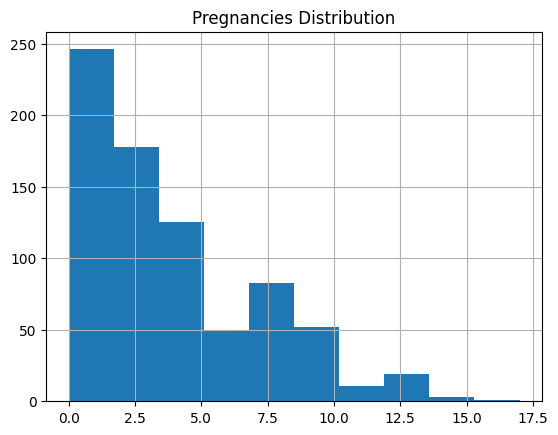

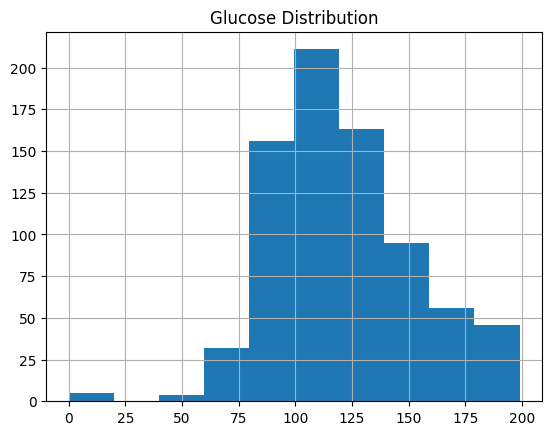

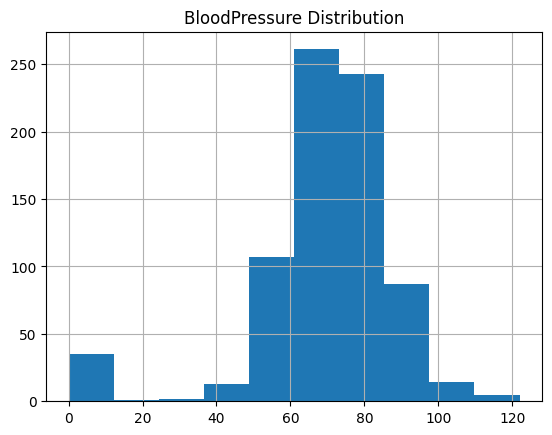

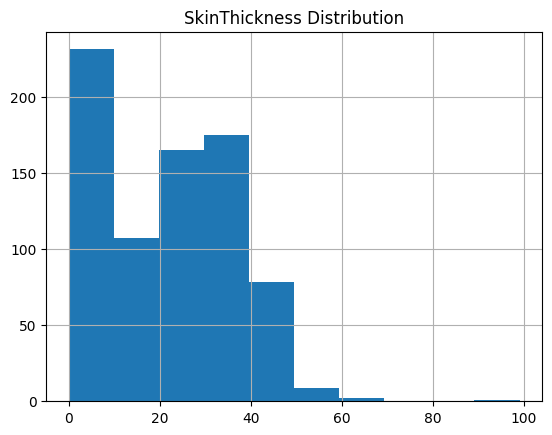

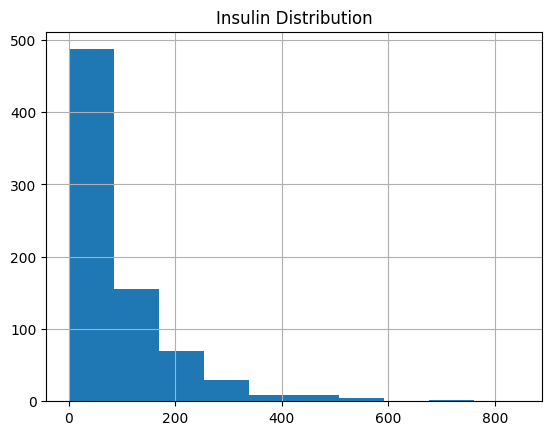

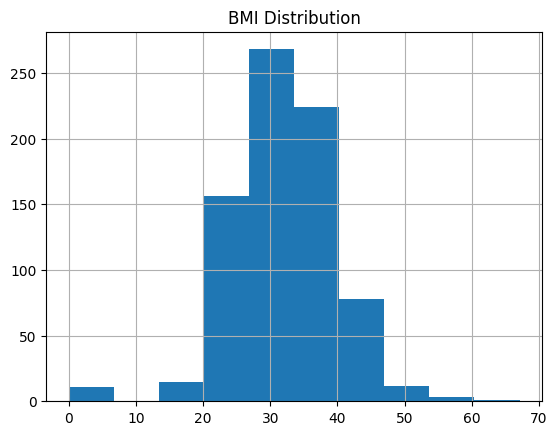

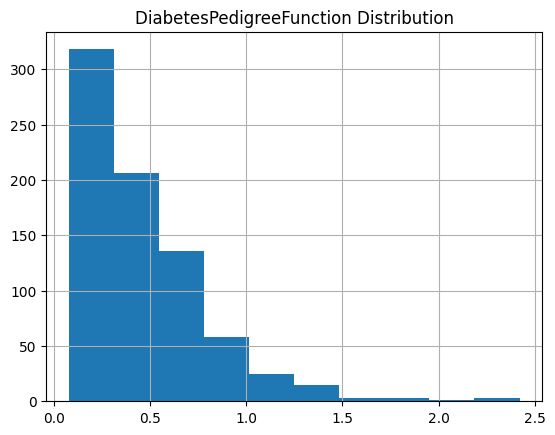

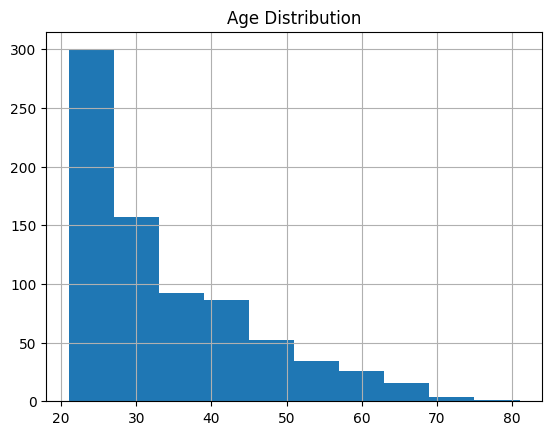

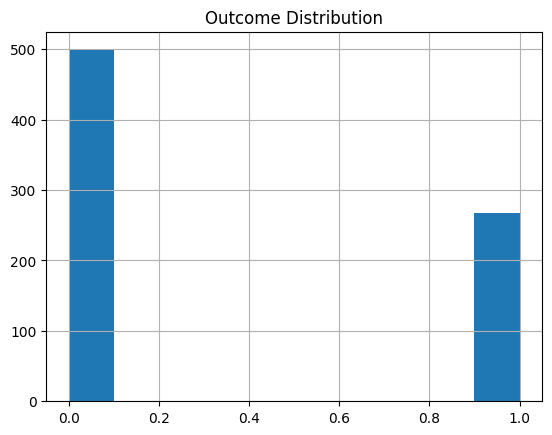

In [41]:
for col in df.columns:
    df[col].hist(bins=10)
    plt.title("%s Distribution" % col)
    plt.show()